### Pima Indians Diabetes Analysis

This is an exercise from the Udemy course "Hands-on Keras for Machine Learning Engineers"
It is also the example used on the blog at:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

It is a good introduction to Keras because the data is in a "clean" format that can be used directly.

I extended the analysis to include some NN parameter variation, visualization of the dat with a Seaborn PairPlot added a  Train/test split of the original dataset to generate a confusion matrix for the held out test dataset.. The analysis below shows an accuracy similar to that in the tutorials. There was a significant improvement in accuracy after normalizing the data (scikit-learn StandardScaler) from 77% to 88-89%.

In [9]:
# first neural network with keras tutorial
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# load the dataset into a numpy array
dataset = loadtxt('pima-indians-diabetes-data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

The input variables (columns) 
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)


In [126]:
# Create a Sequential model and add layers one at a time
# Note: the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer 
# and the first hidden layer.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [127]:
# training a network means finding the best set of weights to map inputs to outputs in our dataset
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model

In [128]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 2s 2ms/step - loss: 4.4338 - accuracy: 0.6211
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 1.2522 - accuracy: 0.5586
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9607 - accuracy: 0.6003
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8257 - accuracy: 0.6237
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7953 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.6536
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7316 - accuracy: 0.6628
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.6693
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6758
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.6797
Epoch 11/

77/77 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7487
Epoch 83/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.7604
Epoch 84/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7474
Epoch 85/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7513
Epoch 86/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7487
Epoch 87/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.7565
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7591
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7448
Epoch 90/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.7591
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7630
Epoch 92/150


Print out the final accuracy

In [129]:
_, accuracy = model.evaluate(X,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7721


Results:<br>
With 12 in the first layer and 8 in the second layer: 80.47%, 81.77%, 81.51%, 80.73%, 81.12%<br>

With 8 (vs 12) nodes in the first layer, accuracy =75.13%<br>
With 10 (vs 12) nodes in the first layer, accuracy =76.04%<br>
With 13 (vs 12) nodes in the first layer, accuracy =77.08%, 79.30%<br>
With 14 (vs 12) nodes in the first layer, accuracy =79.30%<br>
With 16 (vs 12) nodes in the first layer, accuracy =76.56%<br>

With 12 in the first layer and 10 (vs 8) in the second layer: 78.78%, 80.08%, 82.30%, 80.21%, 80.99%

### Conclusions
This was a good introductory example because the input data is ready to go and a simple model appers to be adequate.

One thing worth trying is scaling the data, since the ranges of the individual features varies.

In [95]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()
XS = scaler.fit_transform(X)

In [131]:
XS

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [132]:
model.fit(XS, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8183 - accuracy: 0.6510
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.6536
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.6654
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6810
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.6914
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7109
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7135
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.7253
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7188
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7318
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7969
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8060
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8021
Epoch 86/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8021
Epoch 87/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8099
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8047
Epoch 89/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8034
Epoch 90/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8047
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8060
Epoch 92/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8073
Epoch 93/150


In [117]:
_, accuracy = model.evaluate(XS,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.8971


Results after normalizing the inputs:
With 12 nodes in the first layer and 8 nodes in the second layer: 83.72%, 85.55%, 87.50%, 90.10%, 90.49%

The results are better but something looks suspicious. With each successive run, the accuracy improved. Looking at the interim results, the first epoch has a pretty high accuracy ~80% versus the original example ~60%. I recompiled the model and first epoch accuracy was 66%, but the end result was the same, accuracy = 89.71% for the scaled data.

### Using a Validation Dataset

Given the run-to-run variability in the accuracy, I will try the validation_split functionality of the keras .fit() method. I think what this is doing is dividing the dataset (according to the split fraction) and then running the model twice for each epoch, once with the training data and once with the validation data. The validation data was not used during model training. Then, for each epoch, the dataset is again divided to vary the training and validation data. For each epoch, the validation loss and accuracy are reported as well as the training loss and accuracy.

It would be nice to get a plot of the accuracy versus epoch as well.

In [125]:
model2 = Sequential()
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(XS, y, validation_split=0.1,epochs=150, batch_size=10)
_, accuracy = model.evaluate(XS,y)

Epoch 1/150
70/70 [==============================] - 1s 5ms/step - loss: 0.7143 - accuracy: 0.6570 - val_loss: 0.7168 - val_accuracy: 0.5974
Epoch 2/150
70/70 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6570 - val_loss: 0.6777 - val_accuracy: 0.5974
Epoch 3/150
70/70 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6570 - val_loss: 0.6380 - val_accuracy: 0.5974
Epoch 4/150
70/70 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.6570 - val_loss: 0.6026 - val_accuracy: 0.5974
Epoch 5/150
70/70 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.6671 - val_loss: 0.5745 - val_accuracy: 0.6364
Epoch 6/150
70/70 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7091 - val_loss: 0.5531 - val_accuracy: 0.7273
Epoch 7/150
70/70 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7467 - val_loss: 0.5369 - val_accuracy: 0.7403
Epoch 8/150
7

Epoch 59/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8090 - val_loss: 0.5181 - val_accuracy: 0.7662
Epoch 60/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8104 - val_loss: 0.5169 - val_accuracy: 0.7662
Epoch 61/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8162 - val_loss: 0.5218 - val_accuracy: 0.7792
Epoch 62/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8090 - val_loss: 0.5254 - val_accuracy: 0.7662
Epoch 63/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8032 - val_loss: 0.5237 - val_accuracy: 0.7662
Epoch 64/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8061 - val_loss: 0.5203 - val_accuracy: 0.7792
Epoch 65/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8104 - val_loss: 0.5237 - val_accuracy: 0.7792
Epoch 

70/70 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8220 - val_loss: 0.5249 - val_accuracy: 0.7792
Epoch 117/150
70/70 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8365 - val_loss: 0.5241 - val_accuracy: 0.7532
Epoch 118/150
70/70 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8365 - val_loss: 0.5233 - val_accuracy: 0.7662
Epoch 119/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8336 - val_loss: 0.5267 - val_accuracy: 0.7792
Epoch 120/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8321 - val_loss: 0.5220 - val_accuracy: 0.7532
Epoch 121/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8379 - val_loss: 0.5277 - val_accuracy: 0.7792
Epoch 122/150
70/70 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8321 - val_loss: 0.5213 - val_accuracy: 0.7792
Epoch 123/150

<b><em>Results</em></b><br>
In one run, the val_accuracy appeared to settle in at 75% (range 60%-75%) verses a training accuracy of about 84% (range 66%-84%) which seems reasonable, i.e.the accuracy on non-training data is lower than that of the training data. I am a bit puzzled as to why the accuracy reported by the .evaluate() method (89%) is higher than any of the individual epoch accuracies.

### Visualization of the input data
Use Seaborn PariPlot to visualize the pairwise scatter plots of the input data.

In [136]:
!pip install seaborn


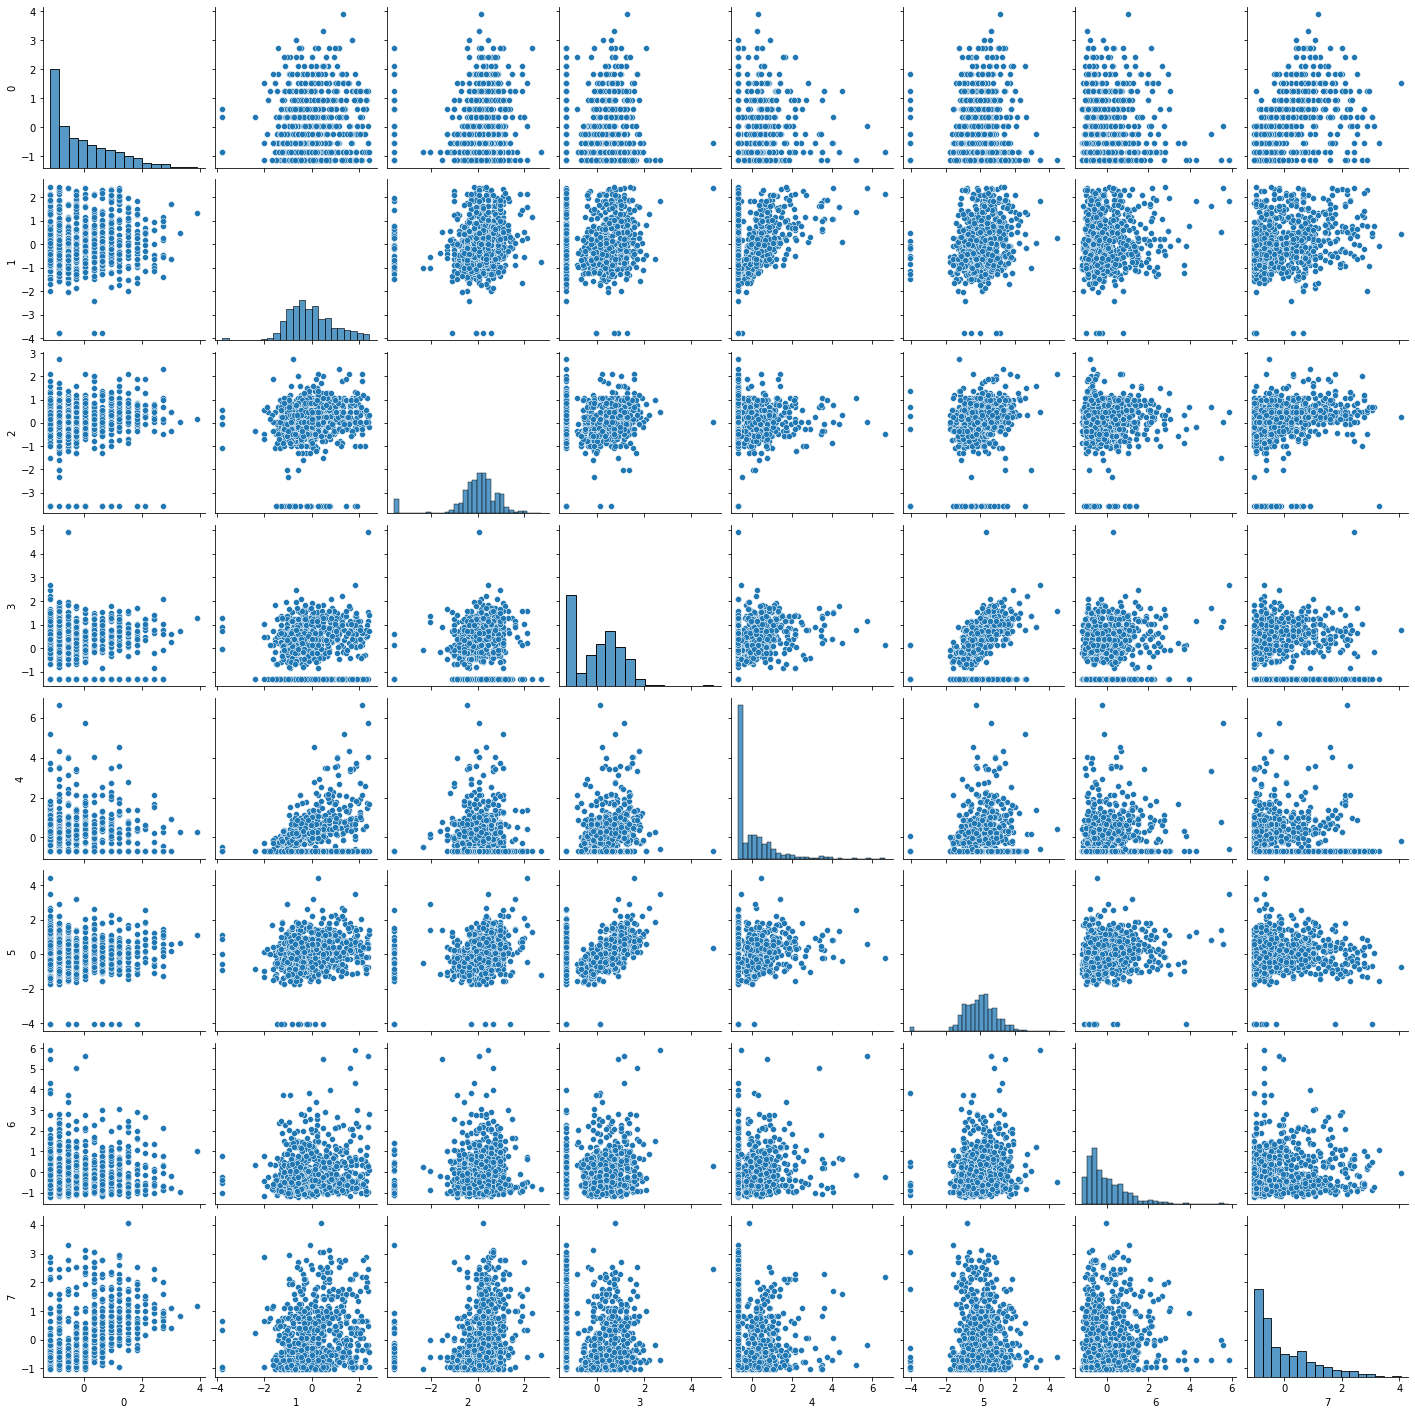

In [141]:
import pandas as pd
import seaborn as sns
sns.pairplot(pd.DataFrame(XS))

### Using a Test Dataset
The following used the scikit Learn Train-Test Split ot generate a test dataset separate from the training dataset.


In [143]:
from sklearn.model_selection import train_test_split
XS_train, XS_test, y_train, y_test = train_test_split(XS, y, train_size=.7)


In [144]:
model3 = Sequential()
model3.add(Dense(12, input_dim=8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(XS_train, y_train, validation_split=0.1,epochs=150, batch_size=10)
_, accuracy = model.evaluate(XS_train,y_train)

Epoch 1/150
49/49 [==============================] - 1s 7ms/step - loss: 0.7315 - accuracy: 0.4327 - val_loss: 0.6421 - val_accuracy: 0.6296
Epoch 2/150
49/49 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6232 - val_loss: 0.5913 - val_accuracy: 0.7593
Epoch 3/150
49/49 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.7143 - val_loss: 0.5511 - val_accuracy: 0.7963
Epoch 4/150
49/49 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.7516 - val_loss: 0.5162 - val_accuracy: 0.8148
Epoch 5/150
49/49 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7578 - val_loss: 0.4841 - val_accuracy: 0.7963
Epoch 6/150
49/49 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.7557 - val_loss: 0.4535 - val_accuracy: 0.7778
Epoch 7/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7598 - val_loss: 0.4310 - val_accuracy: 0.7778
Epoch 8/150
4

Epoch 59/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.7930 - val_loss: 0.3879 - val_accuracy: 0.7593
Epoch 60/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.7909 - val_loss: 0.3876 - val_accuracy: 0.7593
Epoch 61/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.7971 - val_loss: 0.3859 - val_accuracy: 0.7593
Epoch 62/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.7867 - val_loss: 0.3855 - val_accuracy: 0.7593
Epoch 63/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.7888 - val_loss: 0.3876 - val_accuracy: 0.7593
Epoch 64/150
49/49 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.7909 - val_loss: 0.3853 - val_accuracy: 0.7593
Epoch 65/150
49/49 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.7888 - val_loss: 0.3866 - val_accuracy: 0.7593
Epoch 

49/49 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8116 - val_loss: 0.3742 - val_accuracy: 0.7778
Epoch 117/150
49/49 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8199 - val_loss: 0.3748 - val_accuracy: 0.7778
Epoch 118/150
49/49 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8157 - val_loss: 0.3742 - val_accuracy: 0.7778
Epoch 119/150
49/49 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8178 - val_loss: 0.3718 - val_accuracy: 0.7778
Epoch 120/150
49/49 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8157 - val_loss: 0.3756 - val_accuracy: 0.7778
Epoch 121/150
49/49 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8095 - val_loss: 0.3719 - val_accuracy: 0.7593
Epoch 122/150
49/49 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8116 - val_loss: 0.3722 - val_accuracy: 0.7778
Epoch 123/150

In [148]:
y_pred = model3.predict(XS_test)

In [147]:
model3.evaluate(XS_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7662


[0.5134775638580322, 0.7662337422370911]

In [157]:
ypp = []
for yp in y_pred:
    if yp >= 0.5:
        ypp.append(1)
    else:
        ypp.append(0)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ypp)

In [162]:
print(cm)

[[129  18]
 [ 36  48]]


The confusion matrix is used to evaluate the accuracy of a classification.

The definition of the confusion matrix  is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j.<br>
True Positives (TPs): 1	    False Positives (FPs): 1<br>
False Negatives (FNs): 8	True Negatives (TNs): 90

In [160]:
print(classification_report(y_test, ypp))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       147
         1.0       0.73      0.57      0.64        84

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



Precision - What proportion of positive identifications was actually correct?<br> - TP/(TP+FP)
Recall    - What proportion of actual positives was identified correctly? - TP/(TP+FN)

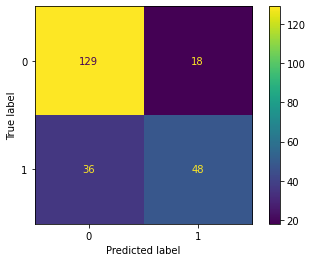

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=None)
disp.plot()
#plt.show()

### Viewing the Model Weights

The model weight and bias array sizes are:
First Layer Weights - 8 x 12
FIrst Layer Biases - 1 x 12
Second Layer Weights - 12 x 8
Second Layer Biases - 1 x 8
Output Layer Weights - 8 x 1
Output Layer Biases - 1 x 1

In [168]:
model.get_weights()

[array([[ 0.23226997, -0.794868  ,  0.4018787 , -0.501746  ,  0.26522052,
          0.28665775,  0.9969756 , -0.26622918, -0.8605797 ,  0.62366265,
         -0.2920455 , -0.3152129 ],
        [-0.26062867,  0.33154336,  0.24402228, -0.36159757,  0.04880365,
         -0.04682752,  0.4318069 , -0.01879247,  0.23389646,  0.13089745,
          0.5708879 ,  0.7197562 ],
        [-0.21072462, -0.14631161, -0.437718  ,  0.23182893,  0.4760841 ,
         -0.8003612 , -0.4856925 , -0.60875785,  0.2422998 ,  0.04302377,
         -0.42208028, -0.35804743],
        [-0.0308986 ,  0.48652074, -0.04411198, -0.33262786,  0.3164823 ,
          0.4170483 , -0.7669479 , -0.2854271 , -0.7025352 ,  0.5523142 ,
          0.2073257 ,  0.1833204 ],
        [-0.03385215, -0.77262104, -1.3587029 ,  0.07832967,  0.01094446,
         -0.23931329,  0.08174174,  0.17269409, -0.29019007,  0.17205718,
          0.1721723 , -0.86958987],
        [-0.35434347, -0.17658372,  0.08523829, -0.30631068,  0.8324958 ,
      

In [170]:
model2.get_weights()

[array([[ 0.4609204 ,  0.47836313,  0.3122779 ,  0.8340401 , -0.3920971 ,
         -0.10935901, -0.08792096, -0.58990633,  0.08357706,  0.05136774,
         -0.6468751 , -0.46894073],
        [ 0.25490716, -0.10305033,  0.07108641,  0.06955566, -0.22812653,
          0.79295677,  0.78601414,  0.82731783, -0.48036206, -0.46690032,
         -0.32712406, -0.31166762],
        [ 0.04292976, -0.55835104,  0.01960586, -0.32566845, -0.5115838 ,
         -0.27904886, -0.26990536,  0.46293893,  0.04677096,  0.14125685,
          0.40601364,  0.27318108],
        [-0.29266888,  0.40273255, -0.32989687, -0.23537277,  0.13526724,
         -1.111162  , -0.40193415,  0.44588214,  0.40228415, -0.72489667,
          0.39953893, -0.20393221],
        [ 0.22292191, -0.3065739 ,  0.60232604,  0.55347085,  0.6037686 ,
          0.03821492,  0.35557064,  0.3419996 ,  0.07309692,  0.2769099 ,
         -0.11985223,  0.39565426],
        [-0.31544837,  0.19771303,  0.12742475,  0.07263011, -0.6354538 ,
      

In [171]:
model3.get_weights()

[array([[ 0.03244657,  0.18026082, -1.070251  ,  0.22705947,  0.46750835,
         -0.4758187 , -0.22918013,  0.00629544,  0.85050607, -0.09747016,
          0.55204207,  0.5513799 ],
        [-0.70795745,  0.3286924 ,  0.43735704,  0.2729476 , -0.0281367 ,
          0.07971985, -0.44826436, -0.3077946 ,  0.2865684 , -0.5404279 ,
          0.42855978, -0.09042386],
        [-0.30588883, -0.35655883, -0.38298962,  0.24997425,  0.04561491,
          0.49141803, -0.68422914, -0.02829524, -0.23041195,  0.4479278 ,
          0.6467109 ,  0.17874783],
        [ 0.6516721 , -0.7791801 , -0.63572925,  0.02717854, -0.27133897,
          0.4590785 , -0.5212514 , -0.40668204,  0.82981515, -0.7163667 ,
         -0.5849696 ,  0.5611721 ],
        [-0.28889415, -0.4399771 ,  0.23812939,  0.5004521 ,  0.46806145,
          0.29326534,  0.29601255,  0.56173617,  0.5240002 ,  0.42604184,
          0.08360856,  0.42216682],
        [ 0.4826277 ,  0.32864136, -0.22101109,  0.3134202 , -0.6243841 ,
      